#Scikitlearn

In [2]:
import numpy as np
import pandas as pd
df = pd.DataFrame(
    {
        'A':[1,np.nan,3,4,5],
        'B':[6,7,8,np.nan,10],
        'C':[11,12,13,14,15]
    }
)
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [4]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [5]:
df.dropna()

,A,B,C
0,1.0,6.0,11
2,3.0,8.0,13
4,5.0,10.0,15


分散正規化

In [10]:
df = pd.DataFrame(
    {
        'A':[1,2,3,4,5],
        'B':[100,200,300,400,500]
    }
)

In [11]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

MinMax正規化

In [12]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
mmsc.fit(df)
mmsc.transform(df)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data, iris.target
df = pd.DataFrame(X,y)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

サポートベクターマシン(SVM)

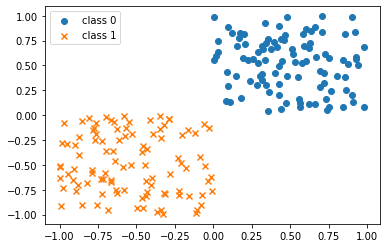

In [22]:
#データ準備
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

#0-1のランダム生成
X0 = np.random.uniform(size=(100,2))
y0 = np.repeat(0,100)

#-1-0のランダム生成
X1 = np.random.uniform(-1,0,size=(100,2))
y1 = np.repeat(1,100)

fig,ax = plt.subplots()
ax.scatter(X0[:,0],X0[:,1],marker='o',label='class 0')
ax.scatter(X1[:,0],X1[:,1],marker='x',label='class 1')
ax.legend()


C:\Users\secre\AppData\Local\Temp\ipykernel_2436\3806204160.py:13: UserWarning: The following kwargs were not used by contour: 'lebels', 'linestyle'
  ax.contour(xx,yy,p,colors='k',lebels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])


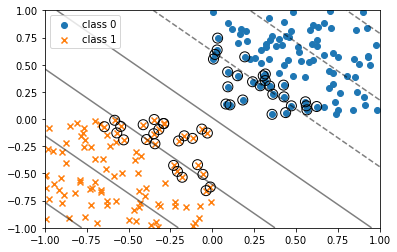

In [33]:
from sklearn.svm import SVC 
def plot_boundary_margin_sv(X0,y0,X1,y1,kernel,C,xmin=-1,xmax=1,ymin=-1,ymax=1):
    svc = SVC(kernel=kernel,C=C)
    svc.fit(np.vstack((X0,X1)),np.hstack((y0,y1)))

    fig,ax = plt.subplots()
    ax.scatter(X0[:,0],X0[:,1],marker='o',label='class 0')
    ax.scatter(X1[:,0],X1[:,1],marker='x',label='class 1')

    xx,yy = np.meshgrid(np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100))
    xy = np.vstack([xx.ravel(),yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100,100))
    ax.contour(xx,yy,p,colors='k',lebels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])

    ax.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=100,facecolors='none',edgecolors='black')
    ax.legend(loc='best')
    plt.show()

plot_boundary_margin_sv(X0,y0,X1,y1,kernel='linear',C=0.1)

決定木  
不純度  

情報利得＝親ノードでの不純度ー子ノードでの不純度の合計  
ジニ不純度、エントロピー、分類誤差

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=123)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)